In [17]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from eda_helpers import plot_bargraph_with_groupings, plot_images

base_path = '../../data/Plant_Data/Plant_Data'

## Extract train dataset

In [18]:
train_base = os.path.join(base_path, 'train')

train_df = pd.DataFrame(columns=['image', 'label', 'class'])
classes = []
i = 0
for dir_name in os.listdir(train_base):
    className = '-'.join(dir_name.split(' ')).lower()
    classes.append(className)
    
    images = []
    for class_dir in os.scandir(os.path.join(train_base, dir_name)):
        images.append([class_dir.path, className, i])
            
    train_class_df = pd.DataFrame(np.array(images), columns=['image', 'label', 'class'])
    
    train_df = train_df.append(train_class_df)
    i += 1
    
train_df = train_df.reset_index(drop=True)

In [19]:
train_df.head(5)

,image,label,class
0,../../data/Plant_Data/Plant_Data/train/red-hot...,red-hot_poker,0
1,../../data/Plant_Data/Plant_Data/train/red-hot...,red-hot_poker,0
2,../../data/Plant_Data/Plant_Data/train/red-hot...,red-hot_poker,0
3,../../data/Plant_Data/Plant_Data/train/red-hot...,red-hot_poker,0
4,../../data/Plant_Data/Plant_Data/train/red-hot...,red-hot_poker,0


## Extract val dataset

In [20]:
val_base = os.path.join(base_path, 'valid')

val_df = pd.DataFrame(columns=['image', 'label', 'class'])
for dir_name in os.listdir(val_base):
    className = '-'.join(dir_name.split(' ')).lower()
    
    images = []
    for class_dir in os.scandir(os.path.join(val_base, dir_name)):
        images.append([class_dir.path, className, classes.index(className)])
            
    val_class_df = pd.DataFrame(np.array(images), columns=['image', 'label', 'class'])
    
    val_df = val_df.append(val_class_df)
    i += 1
val_df = val_df.reset_index(drop=True)

In [21]:
val_df.head(5)

,image,label,class
0,../../data/Plant_Data/Plant_Data/valid/red-hot...,red-hot_poker,0
1,../../data/Plant_Data/Plant_Data/valid/red-hot...,red-hot_poker,0
2,../../data/Plant_Data/Plant_Data/valid/red-hot...,red-hot_poker,0
3,../../data/Plant_Data/Plant_Data/valid/red-hot...,red-hot_poker,0
4,../../data/Plant_Data/Plant_Data/valid/red-hot...,red-hot_poker,0


## Extract test dataset

In [22]:
test_base = os.path.join(base_path, 'test')

test_df = pd.DataFrame(columns=['image', 'label', 'class'])
for dir_name in os.listdir(test_base):
    className = '-'.join(dir_name.split(' ')).lower()
    
    images = []
    for class_dir in os.scandir(os.path.join(test_base, dir_name)):
        images.append([class_dir.path, className, classes.index(className)])
            
    test_class_df = pd.DataFrame(np.array(images), columns=['image', 'label', 'class'])
    
    test_df = test_df.append(test_class_df)
    i += 1
test_df = test_df.reset_index(drop=True)

In [23]:
test_df.head(5)

,image,label,class
0,../../data/Plant_Data/Plant_Data/test/red-hot_...,red-hot_poker,0
1,../../data/Plant_Data/Plant_Data/test/red-hot_...,red-hot_poker,0
2,../../data/Plant_Data/Plant_Data/test/red-hot_...,red-hot_poker,0
3,../../data/Plant_Data/Plant_Data/test/red-hot_...,red-hot_poker,0
4,../../data/Plant_Data/Plant_Data/test/red-hot_...,red-hot_poker,0


## Train Dataset Examples

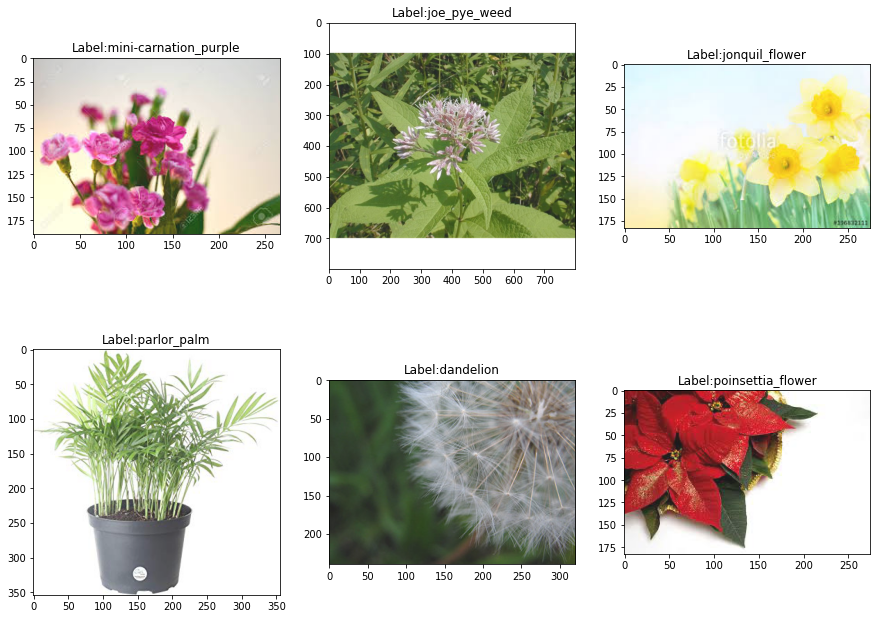

In [49]:
plot_images(train_df, '')

## Train Data Distribution

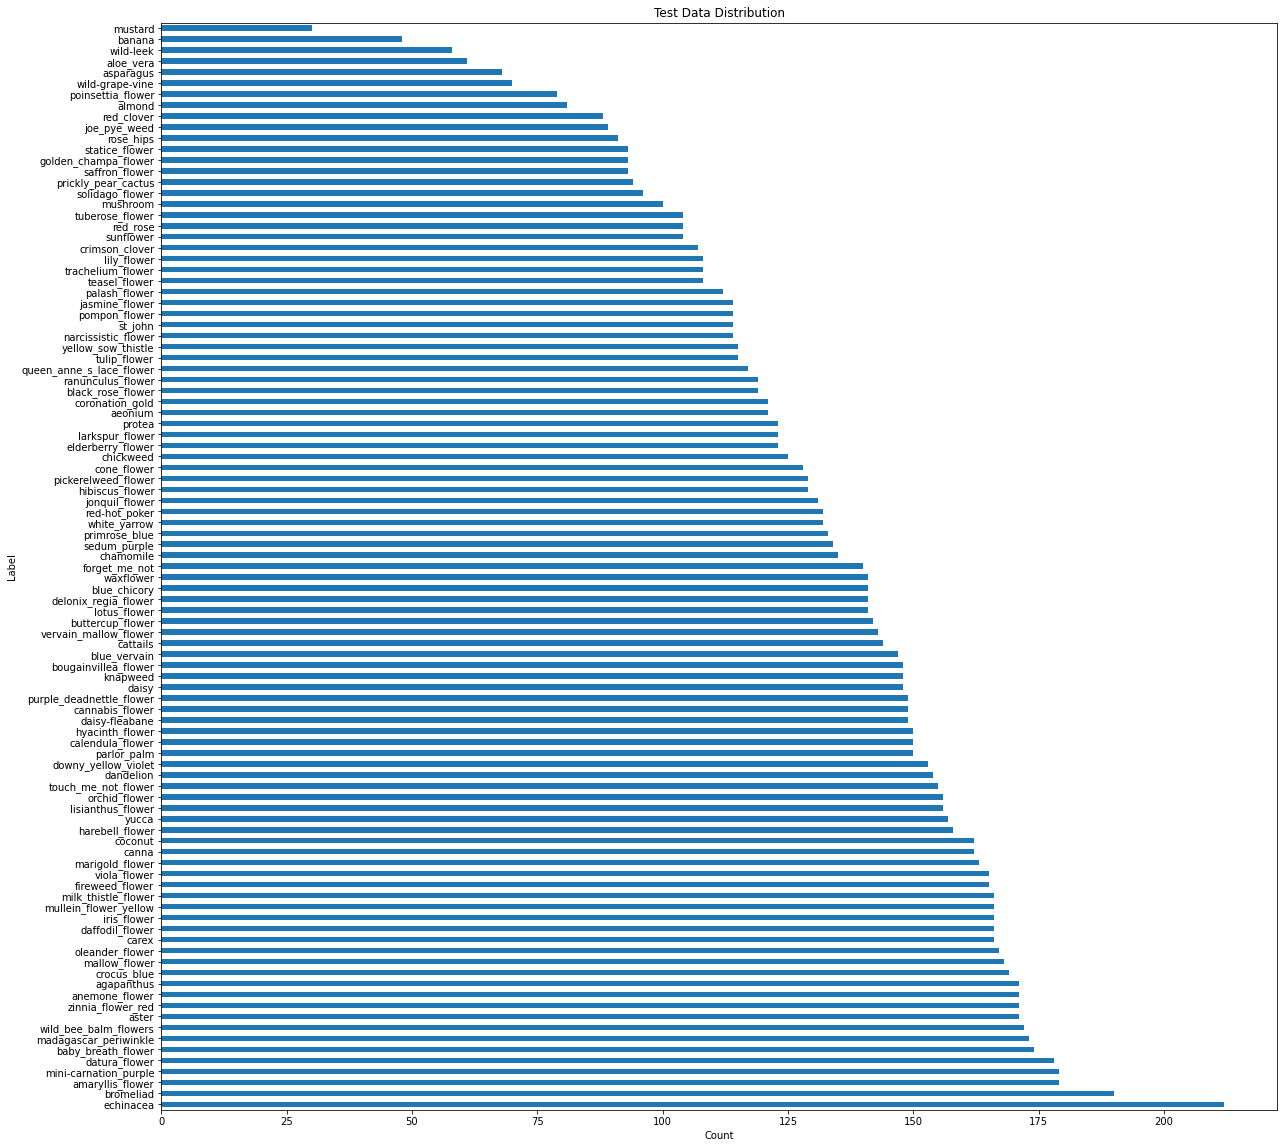

In [25]:
plot_bargraph_with_groupings(train_df, 'label', 'Test Data Distribution', 'Count', 'Label')

In [26]:
train_df['label'].value_counts()

echinacea                212
bromeliad                190
amaryllis_flower         179
mini-carnation_purple    179
datura_flower            178
                        ... 
asparagus                 68
aloe_vera                 61
wild-leek                 58
banana                    48
mustard                   30
Name: label, Length: 99, dtype: int64

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   13149 non-null  object
 1   label   13149 non-null  object
 2   class   13149 non-null  object
dtypes: object(3)
memory usage: 308.3+ KB


## Val Data Distribution

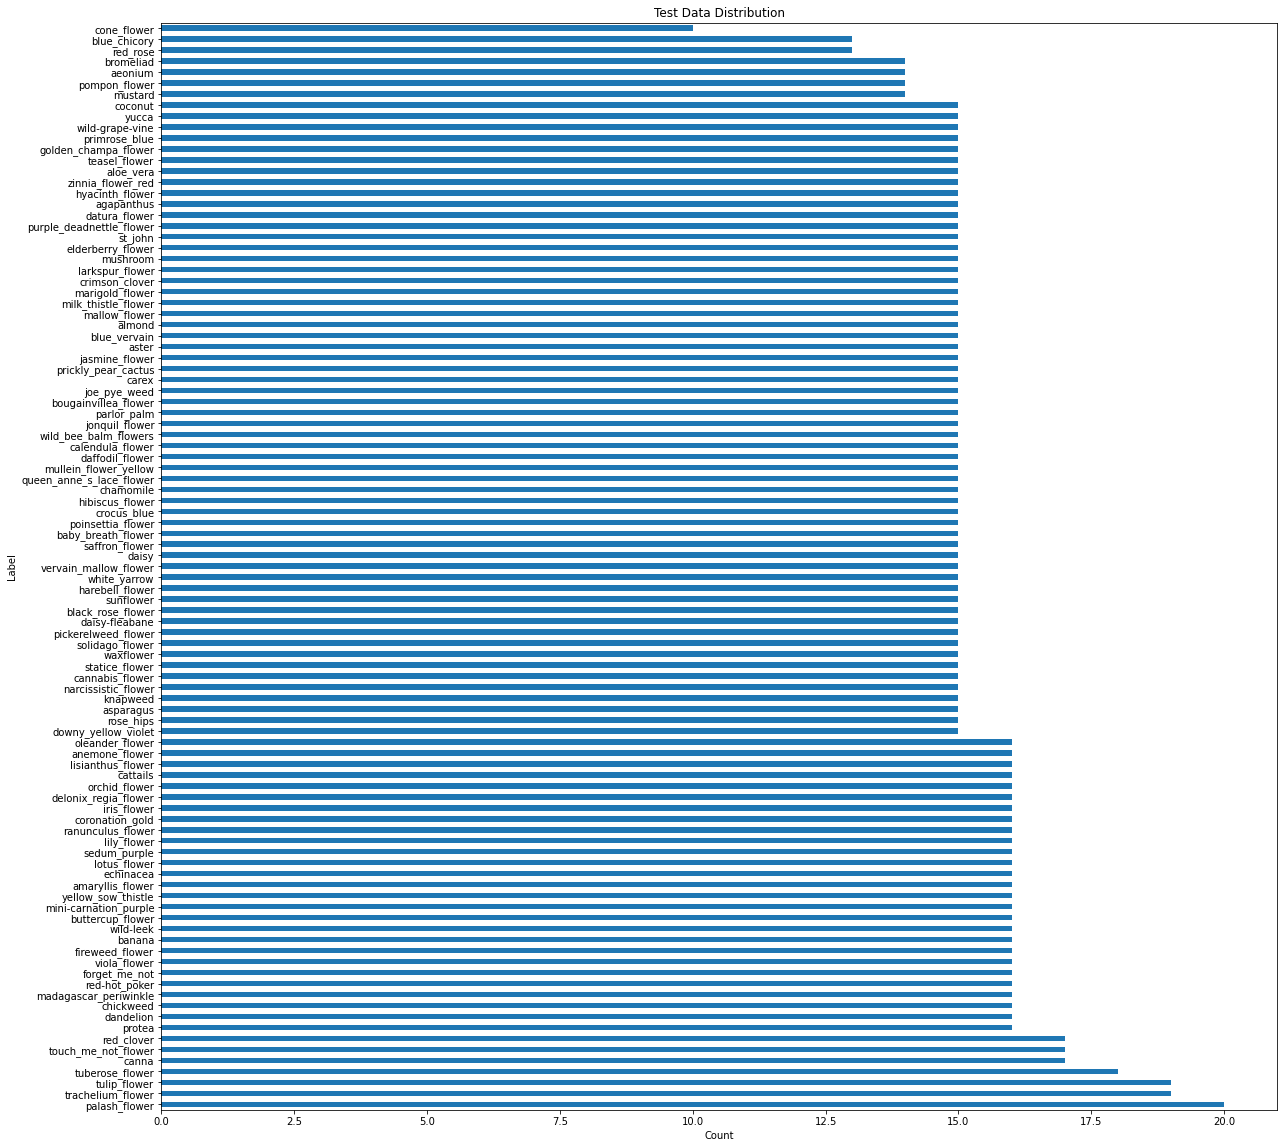

In [31]:
plot_bargraph_with_groupings(val_df, 'label', 'Test Data Distribution', 'Count', 'Label')

In [32]:
val_df['label'].value_counts()

palash_flower        20
trachelium_flower    19
tulip_flower         19
tuberose_flower      18
canna                17
                     ..
aeonium              14
bromeliad            14
red_rose             13
blue_chicory         13
cone_flower          10
Name: label, Length: 99, dtype: int64

In [33]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   1521 non-null   object
 1   label   1521 non-null   object
 2   class   1521 non-null   object
dtypes: object(3)
memory usage: 35.8+ KB


## Test Data Distribution

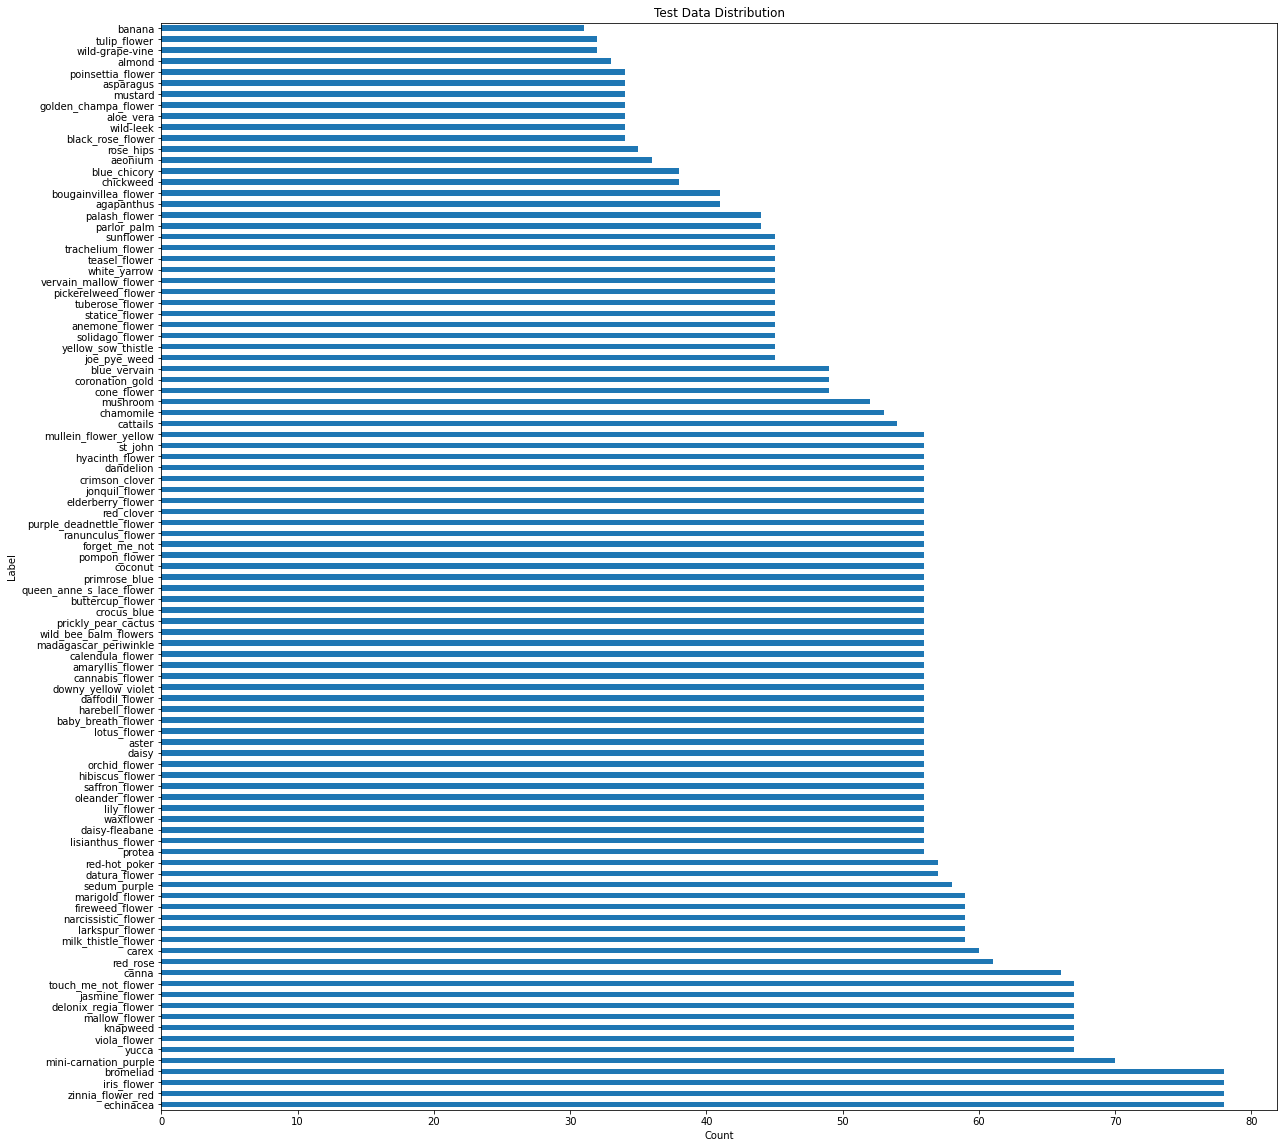

In [28]:
plot_bargraph_with_groupings(test_df, 'label', 'Test Data Distribution', 'Count', 'Label')

In [29]:
test_df['label'].value_counts()

echinacea                78
zinnia_flower_red        78
iris_flower              78
bromeliad                78
mini-carnation_purple    70
                         ..
poinsettia_flower        34
almond                   33
wild-grape-vine          32
tulip_flower             32
banana                   31
Name: label, Length: 99, dtype: int64

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5218 entries, 0 to 5217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   5218 non-null   object
 1   label   5218 non-null   object
 2   class   5218 non-null   object
dtypes: object(3)
memory usage: 122.4+ KB
